## Aligning the Reads to the Human Genome ##  
#### What will you use for the database? Input reads?  ####
We will use the provided human genome database and the provided illumina reads.  
#### If you use the --un unaligned.fastq option, what will unaligned.fastq contain?  ####
unaligned.fastq would contain all the reads that couldn't be aligned to the S.oneidensis reference genome.

In [1]:
import subprocess

command = "bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq"

#run above command in terminal and print output
test = subprocess.Popen(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output = test.communicate()[1].decode("utf-8")
print(output)

1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    1028379 (91.43%) aligned 0 times
    87274 (7.76%) aligned exactly 1 time
    9061 (0.81%) aligned >1 times
8.57% overall alignment rate



#### What percentage of your sequencing library came from contaminating human DNA? ####  
8.57% of our sequencing library came from contaminating human DNA.

## Aligning the Reads to the S.oneidensis Genome ##    
#### If you use the --un unaligned.fastq option, what will unaligned.fastq contain?  ####
unaligned.fastq would contain all the reads that couldn't be aligned to the S.oneidensis reference genome.

In [2]:
import subprocess

command = "bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U /data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq"

#run above command in terminal and print output
test = subprocess.Popen(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output = test.communicate()[1].decode("utf-8")
print(output)

1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    395895 (35.20%) aligned 0 times
    687571 (61.13%) aligned exactly 1 time
    41248 (3.67%) aligned >1 times
64.80% overall alignment rate



#### What percentage of your filtered library didn't align to the reference genome? ####
35.20% of our sequencing library did not align to the S.oneidensis reference genome.
#### If you use --very-sensitive instead of --very-fast, does this percentage increase or decrease? ####

In [3]:
import subprocess

command = "bowtie2 -p 4 --very-sensitive --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U /data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq"

#run above command in terminal and print output
test = subprocess.Popen(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output = test.communicate()[1].decode("utf-8")
print(output)

1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    394447 (35.07%) aligned 0 times
    688180 (61.19%) aligned exactly 1 time
    42087 (3.74%) aligned >1 times
64.93% overall alignment rate



Using --very-sensitive instead of --very-fast very slightly reduces the misalignment percentage.

## Generating a Coverage Plot ##    

#### Converting SAM to BAM ####  
Command in terminal:  
>samtools view -S -b Lab6/output.sam > Lab6/output_converted.bam
#### Sorting ####  
Command in terminal:  
>samtools sort -o Lab6/output_sorted.bam Lab6/output_converted.bam
#### Indexing ####  
Command in terminal:  
>samtools index Lab6/output_sorted.bam
#### Generating Depth of Coverage ####  
Command in terminal:  
>samtools depth -a Lab6/output_sorted.bam > Lab6/pileup.tab

## Depth of coverage vs. position scatter plot

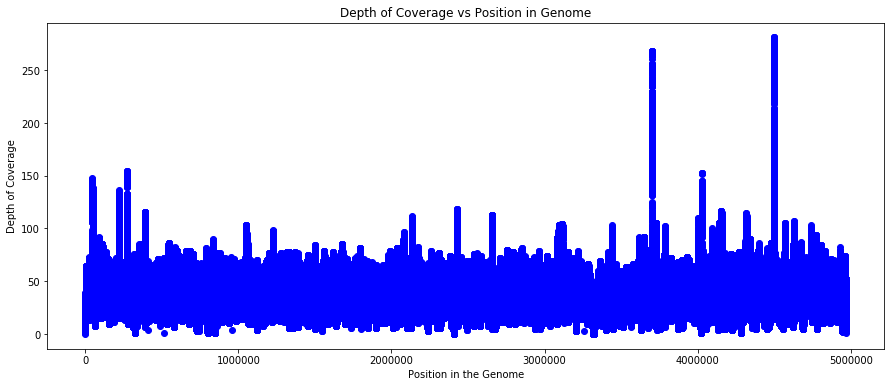

In [20]:
import matplotlib.pyplot as plt

# Extract coverage
fl = open("pileup.tab", "r").read()
coverage = []
for l in fl.split("\n")[:-1]:
    data = l.split("\t")
    coverage.append(int(data[2]))    

# plot depth of coverage vs position scatter plot
plt.figure(figsize=(15,6))
plt.xlabel('Position in the Genome')
plt.ylabel('Depth of Coverage')
plt.title("Depth of Coverage vs Position in Genome")
plt.scatter(range(len(coverage)), coverage, color = ['blue'])

## Count vs. depth of coverage histogram graph

<BarContainer object of 282 artists>

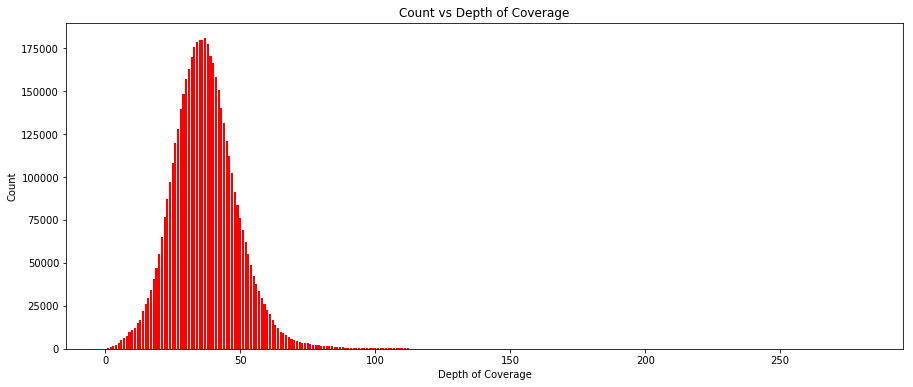

In [25]:
# count depth of coverage
count = []
for i in range(0,max(coverage)+1):
    count.append(coverage.count(i))

# plot count vs depth of coverage
plt.figure(figsize=(15,6))
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.title("Count vs Depth of Coverage")
plt.bar(range(0,len(count)), count, color = ['red'])

##### What is the min, max, and mean coverage across all positions?

In [5]:
max_coverage = max(coverage)
min_coverage = min(coverage)
ave_coverage = sum(coverage)/len(coverage)
print("The min coverage is", min_coverage, ", the max coverage is", max_coverage, ", and the mean coverage is", ave_coverage)

The min coverage is 0 , the max coverage is 281 , and the mean coverage is 37.03830306625343


## Extra Credit Task 1  
### Aligning the Reads to Human Genome

In [26]:
import subprocess

# Align read to human genome
command = "bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq"

#run above command in terminal and print output
test = subprocess.Popen(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output = test.communicate()[1].decode("utf-8")
print(output)

1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    1028379 (91.43%) aligned 0 times
    87274 (7.76%) aligned exactly 1 time
    9061 (0.81%) aligned >1 times
8.57% overall alignment rate



## Generating a Coverage Plot ##    

#### Converting SAM to BAM ####  
Command in terminal:  
>samtools view -S -b Lab6/output.sam > Lab6/output_converted.bam
#### Sorting ####  
Command in terminal:  
>samtools sort -o Lab6/output_sorted.bam Lab6/output_converted.bam
#### Indexing ####  
Command in terminal:  
>samtools index Lab6/output_sorted.bam
#### Generating Depth of Coverage ####  
Command in terminal:  
>samtools depth -a Lab6/output_sorted.bam > Lab6/pileup.tab  
## Plotting

In [ ]:
# Extract coverage
fl = open("pileup.tab", "r").read()
coverage = []
for l in fl.split("\n")[:-1]:
    data = l.split("\t")
    coverage.append(int(data[2]))  

# plot depth of coverage vs position scatter plot
plt.figure(figsize=(15,6))
plt.xlabel('Position in the Genome')
plt.ylabel('Depth of Coverage')
plt.title("Depth of Coverage vs Position in Genome")
plt.scatter(range(len(coverage)), coverage, color = ['blue'])

# count depth of coverage
count = []
for i in range(0,max(coverage)+1):
    count.append(coverage.count(i))

# plot count vs depth of coverage
plt.figure(figsize=(15,6))
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.title("Count vs Depth of Coverage")
plt.bar(range(0,len(count)), count, color = ['red'])